In [1]:
%matplotlib inline
from chesslab.agent_torch import agent
from chesslab.agent_mcts_v2 import agent_MCTS, MCTS_graph
#from chesslab_.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
from chesslab.utils import join_and_sort
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from IPython.display import display
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
import torch.nn as nn
class Model_0(nn.Module):

    def __init__(self):
        super().__init__()
        #self.func_1=nn.ReLU()
        #self.func_2=nn.ReLU()
        #self.func_3=nn.ReLU()
        #self.func_4=nn.ReLU()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        #self.d1 = nn.Dropout(0.5)
        #self.d2 = nn.Dropout(0.5)
        #self.d3 = nn.Dropout(0.5)
        #self.d4 = nn.Dropout(0.5)
        
        #self.b1= nn.BatchNorm2d(32)
        #self.b2= nn.BatchNorm2d(64)
        #self.b3= nn.BatchNorm2d(128)
        #self.b4 = nn.BatchNorm1d(256)
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        #out = self.b1(out)
        out = self.func_1(out)
        #out = self.d1(out)
        out = self.cnn_2(out)
        #out = self.b2(out)
        out = self.func_2(out)
        #out = self.d2(out)
        out = self.cnn_3(out)
        #out = self.b3(out)
        out = self.func_3(out)
        #out = self.d3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        #out = self.b4(out)
        out = self.func_4(out)
        #out = self.d4(out)
        out = self.linear_2(out)

        return out
model = Model_0()

In [3]:
a = 2
a = a+1 if False else a-1
a

1

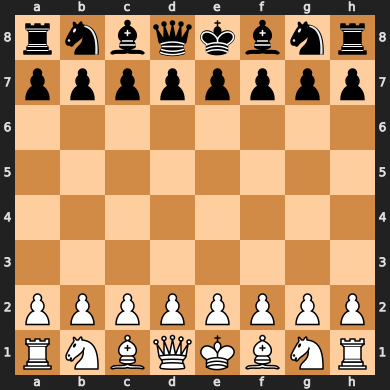

In [4]:
board=chess.Board()
board

In [5]:
base_name = './tmp/test_noeaten.0.'
deepbot = agent(model,base_name+'3.pt',)
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('d2d4')

In [6]:
moves,values=deepbot.get_move_values(board,both_players=True)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
np.round(values.tolist())

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [9]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=2)

In [10]:
moves,values=deepMCTS.get_move_values(board)

MCTS - nodes:2321 Elapsed time: 1.26s = 0.02m nps=1842


In [11]:
moves

[Move.from_uci('a2a4'),
 Move.from_uci('b2b4'),
 Move.from_uci('c2c4'),
 Move.from_uci('d2d4'),
 Move.from_uci('e2e4'),
 Move.from_uci('f2f4'),
 Move.from_uci('g2g4'),
 Move.from_uci('h2h4'),
 Move.from_uci('a2a3'),
 Move.from_uci('b2b3'),
 Move.from_uci('c2c3'),
 Move.from_uci('d2d3'),
 Move.from_uci('e2e3'),
 Move.from_uci('f2f3'),
 Move.from_uci('g2g3'),
 Move.from_uci('h2h3'),
 Move.from_uci('b1a3'),
 Move.from_uci('b1c3'),
 Move.from_uci('g1f3'),
 Move.from_uci('g1h3')]

In [12]:
values

array([0.61340502, 0.59754188, 0.63266649, 0.65063835, 0.62951965,
       0.61379801, 0.61255801, 0.61695917, 0.60381468, 0.60351253,
       0.61677455, 0.61157497, 0.59968652, 0.60041342, 0.6228948 ,
       0.6338622 , 0.61336686, 0.62966288, 0.61267156, 0.43764919])

In [13]:
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.6506383467693718],
       [Move.from_uci('h2h3'), 0.6338622038029442],
       [Move.from_uci('c2c4'), 0.6326664891736261],
       [Move.from_uci('b1c3'), 0.629662875471444],
       [Move.from_uci('e2e4'), 0.6295196533203125],
       [Move.from_uci('g2g3'), 0.6228948033841929],
       [Move.from_uci('h2h4'), 0.616959168030335],
       [Move.from_uci('c2c3'), 0.6167745504293356],
       [Move.from_uci('f2f4'), 0.6137980063130536],
       [Move.from_uci('a2a4'), 0.6134050233023507],
       [Move.from_uci('b1a3'), 0.6133668554110789],
       [Move.from_uci('g1f3'), 0.6126715561439251],
       [Move.from_uci('g2g4'), 0.6125580104051438],
       [Move.from_uci('d2d3'), 0.6115749662956306],
       [Move.from_uci('a2a3'), 0.6038146846550555],
       [Move.from_uci('b2b3'), 0.6035125320022171],
       [Move.from_uci('f2f3'), 0.6004134249096075],
       [Move.from_uci('e2e3'), 0.5996865234375],
       [Move.from_uci('b2b4'), 0.5975418778153153],
       [Move.from

MCTS - nodes:4640 Elapsed time: 1.38s = 0.02m nps=3355


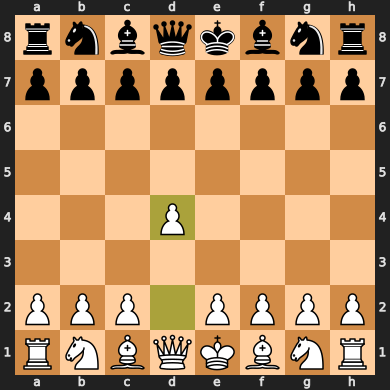

In [14]:
move=deepMCTS.select_move(board)
board.push(move)
board

In [15]:
acc,acc_w,boards,data = kaufman_test(deepbot,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 7/25 = 0.28 | weighted = 0.78
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6028 & c1c7 & 0.8570  \\
02 & f5d4 & 21 & 39 & 0.4737 & 0.6340 & a5d2 & 0.8480  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5060 & f2c5 & 0.9166  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7354 & b1b2 & 0.7354  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9494 & c8c3 & 0.9652  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5175 & a3a2 & 0.5175  \\
07 & b7e4 & 28 & 33 & 0.1562 & 0.4157 & c8e8 & 0.5566  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.3948 & e1c1 & 0.8030  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.5897 & d2h6 & 0.7519  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.7615 & c7a5 & 0.7646  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8507 & g3f5 & 0.8507  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0049 & e7e4 & 0.0164  \\
13 & c3d5 & 8 & 30 & 0.7586 & 0.9945 & f1f6 & 0.9999  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.3167 & d3g6 & 0.9083  \\
15 & d3f5 & 6 & 51 & 0.9000 & 0.6632 & h6f8 & 0.8363  \\
16 & b3b4 & 1 & 10 & 1.0000 & 0.7953 & b

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.602791,c1c7,0.857030,6,48,0.893617
1,f5d4,0.634004,a5d2,0.848028,21,39,0.473684
2,e1d1,0.505972,f2c5,0.916630,21,38,0.459459
3,b1b2,0.735360,b1b2,0.735360,1,47,1.000000
4,g5c1,0.949427,c8c3,0.965190,2,48,0.978723
5,a3a2,0.517546,a3a2,0.517546,1,31,1.000000
6,b7e4,0.415699,c8e8,0.556603,28,33,0.156250
7,h7h6,0.394792,e1c1,0.802965,11,39,0.736842
8,f3e2,0.589749,d2h6,0.751859,8,35,0.794118
9,d5c3,0.761462,c7a5,0.764555,2,41,0.975000


In [16]:
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:4832 Elapsed time: 2.77s = 0.05m nps=1745
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:4133 Elapsed time: 2.42s = 0.04m nps=1704
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:3809 Elapsed time: 2.16s = 0.04m nps=1760
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:4599 Elapsed time: 2.79s = 0.05m nps=1651
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:4490 Elapsed time: 2.55s = 0.04m nps=1758
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:3058 Elapsed time: 1.72s = 0.03m nps=1781
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:3573 Elapsed time: 2.07s = 0.03m nps=1723
El estado de juego no corresponde con el de la r

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.548254,c1c7,0.862523,19,48,0.617021
1,f5d4,0.562849,g8g7,0.708047,22,39,0.447368
2,e1d1,0.562443,f2c5,0.862887,6,38,0.864865
3,b1b2,0.747648,b1b2,0.747648,1,47,1.000000
4,g5c1,0.903786,g5c1,0.903786,1,48,1.000000
5,a3a2,0.463712,a3a2,0.463712,1,31,1.000000
6,b7e4,0.389432,d7c5,0.498842,23,33,0.312500
7,h7h6,0.317990,e1c1,0.680536,27,39,0.315789
8,f3e2,0.498958,d2h6,0.683784,13,35,0.647059
9,d5c3,0.698528,d5c3,0.698528,1,41,1.000000


In [17]:
deepMCTS.set_max_iter(1000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:47545 Elapsed time: 26.22s = 0.44m nps=1813
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:41004 Elapsed time: 22.85s = 0.38m nps=1794
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:37091 Elapsed time: 21.54s = 0.36m nps=1722
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:46462 Elapsed time: 27.24s = 0.45m nps=1706
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:42166 Elapsed time: 24.28s = 0.40m nps=1736
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:29728 Elapsed time: 17.23s = 0.29m nps=1726
El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - nodes:35347 Elapsed time: 20.47s = 0.34m nps=1727
El estado de juego no corresponde 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.561399,c1c7,0.727005,17,48,0.659574
1,f5d4,0.589547,a5d2,0.647512,13,39,0.684211
2,e1d1,0.503184,f2c5,0.584028,18,38,0.540541
3,b1b2,0.731237,b1b2,0.731237,1,47,1.000000
4,g5c1,0.485795,g5c1,0.485795,1,48,1.000000
5,a3a2,0.429212,a3a2,0.429212,1,31,1.000000
6,b7e4,0.403639,c7c5,0.458733,24,33,0.281250
7,h7h6,0.397759,b6a8,0.488920,13,39,0.684211
8,f3e2,0.553971,d2a5,0.593180,7,35,0.823529
9,d5c3,0.541692,d5c3,0.541692,1,41,1.000000


In [ ]:
deepMCTS.set_max_iter(10000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [19]:
G = MCTS_graph(deepMCTS)
G.save_graph("mcts.dot",depth=2)

Total nodes: 527
Grafo guardado en: mcts.dot


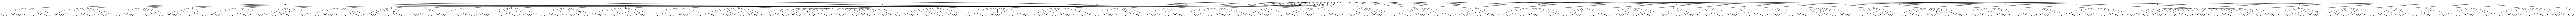

In [20]:
g = nx.Graph(nx.drawing.nx_pydot.read_dot("mcts.dot"))
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('example.png')
pil_im = Image.open('example.png', 'r')
display(pil_im)